In [4]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from io import BytesIO

In [5]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [19]:
from google.colab import files
uploaded = files.upload()

Saving ScreenShot-2024-9-27_14-33-51.png to ScreenShot-2024-9-27_14-33-51.png


In [20]:
image_path = list(uploaded.keys())[0]

In [21]:
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
image_tensor = image_tensor.to(device)

In [23]:
with torch.no_grad():
    predictions = model(image_tensor)

In [24]:
boxes = predictions[0]['boxes'].cpu()
labels = predictions[0]['labels'].cpu()
scores = predictions[0]['scores'].cpu()

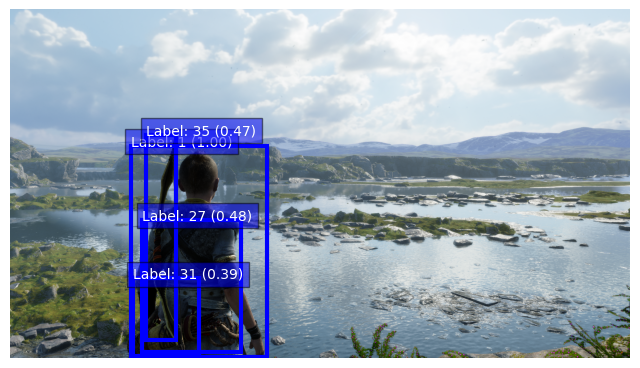

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
ax.axis("off")  # Remove axes for clarity

# Draw bounding boxes for objects with confidence > 0.3
for box, label, score in zip(boxes, labels, scores):
    if score > 0.3:  # Adjust confidence threshold
        x_min, y_min, x_max, y_max = box
        rect = patches.Rectangle(
            (x_min, y_min), x_max - x_min, y_max - y_min,
            linewidth=3, edgecolor='blue', facecolor='none'  # Use blue for visibility
        )
        ax.add_patch(rect)
        ax.text(x_min, y_min, f"Label: {label} ({score:.2f})",
                color='white', fontsize=10, bbox=dict(facecolor='blue', alpha=0.5))

plt.show()